<a href="https://colab.research.google.com/github/KiritiVelivela/EVA4_B2/blob/master/S7/EVA4B2_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [0]:
# Import the modules
import Utils
import Model
import Model_train
import Model_test

In [0]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  dog truck horse  deer


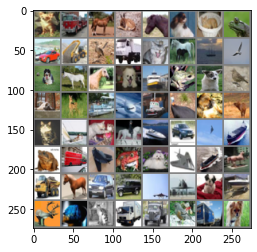

In [6]:
# random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
!pip install torchsummary
from torchsummary import summary
#selecting the GPU
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)


In [0]:
model = Model.Net().to(device)
summary(model, input_size=(3, 32, 32))

In [0]:
def model_call(model, device, trainloader, optimizer,testloader, epoch):

  Model_train.train(model, device, trainloader, optimizer, epoch, train_loss, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_loss, test_acc)

In [10]:
model =  Model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 16


for epoch in range(EPOCHS):
  print("EPOCH -- ", epoch+1)
  model_call(model, device, trainloader, optimizer,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0911340713500977 Batch_id=781 Accuracy=49.61: 100%|██████████| 782/782 [00:47<00:00, 16.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9229, Accuracy: 6700/10000 (67.00%)

EPOCH: 2


Loss=0.6797695755958557 Batch_id=781 Accuracy=66.06: 100%|██████████| 782/782 [00:46<00:00, 16.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7453, Accuracy: 7383/10000 (73.83%)

EPOCH: 3


Loss=0.8324551582336426 Batch_id=781 Accuracy=72.58: 100%|██████████| 782/782 [00:45<00:00, 17.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6684, Accuracy: 7659/10000 (76.59%)

EPOCH: 4


Loss=0.7396140098571777 Batch_id=781 Accuracy=78.91: 100%|██████████| 782/782 [00:47<00:00, 16.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5548, Accuracy: 8104/10000 (81.04%)

EPOCH: 5


Loss=0.9795073866844177 Batch_id=781 Accuracy=80.60: 100%|██████████| 782/782 [00:47<00:00, 16.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5331, Accuracy: 8173/10000 (81.73%)

EPOCH: 6


Loss=0.4345652163028717 Batch_id=781 Accuracy=81.20: 100%|██████████| 782/782 [00:46<00:00, 16.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5242, Accuracy: 8198/10000 (81.98%)

EPOCH: 7


Loss=1.0219272375106812 Batch_id=781 Accuracy=82.25: 100%|██████████| 782/782 [00:46<00:00, 16.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5180, Accuracy: 8220/10000 (82.20%)

EPOCH: 8


Loss=0.3003474473953247 Batch_id=781 Accuracy=82.51: 100%|██████████| 782/782 [00:47<00:00, 16.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5176, Accuracy: 8230/10000 (82.30%)

EPOCH: 9


Loss=0.39766016602516174 Batch_id=781 Accuracy=82.51: 100%|██████████| 782/782 [00:47<00:00, 16.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5166, Accuracy: 8233/10000 (82.33%)

EPOCH: 10


Loss=0.369831383228302 Batch_id=781 Accuracy=82.66: 100%|██████████| 782/782 [00:46<00:00, 16.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5171, Accuracy: 8225/10000 (82.25%)

EPOCH: 11


Loss=0.3885340094566345 Batch_id=781 Accuracy=82.59: 100%|██████████| 782/782 [00:45<00:00, 17.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5179, Accuracy: 8239/10000 (82.39%)

EPOCH: 12


Loss=0.7808754444122314 Batch_id=781 Accuracy=82.48: 100%|██████████| 782/782 [00:46<00:00, 16.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5163, Accuracy: 8243/10000 (82.43%)

EPOCH: 13


Loss=0.881963312625885 Batch_id=781 Accuracy=82.71: 100%|██████████| 782/782 [00:46<00:00, 16.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5163, Accuracy: 8245/10000 (82.45%)

EPOCH: 14


Loss=0.4513668417930603 Batch_id=781 Accuracy=82.49: 100%|██████████| 782/782 [00:45<00:00, 17.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5189, Accuracy: 8236/10000 (82.36%)

EPOCH: 15


Loss=0.7821184992790222 Batch_id=781 Accuracy=82.55: 100%|██████████| 782/782 [00:45<00:00, 17.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5161, Accuracy: 8228/10000 (82.28%)

EPOCH: 16


Loss=0.5692809224128723 Batch_id=781 Accuracy=82.74: 100%|██████████| 782/782 [00:46<00:00, 16.76it/s]



Test set: Average loss: 0.5164, Accuracy: 8239/10000 (82.39%)



GroundTruth:   deer horse   car   cat


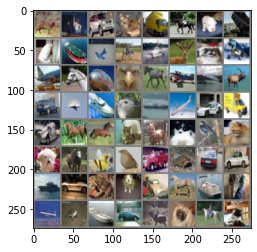

In [11]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # the inputs
        out_imag = data[0].to(device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   cat  ship plane


In [13]:
import Utils
# Print total accuracy
Utils.total_accuracy(testloader,model,device)

Accuracy of the network on the 10000 test images: 82 %


In [14]:
# Printi classwise accuracy
Utils.class_accuracy(testloader, model,device)

Accuracy of plane : 89 %
Accuracy of   car : 88 %
Accuracy of  bird : 72 %
Accuracy of   cat : 64 %
Accuracy of  deer : 80 %
Accuracy of   dog : 69 %
Accuracy of  frog : 92 %
Accuracy of horse : 89 %
Accuracy of  ship : 89 %
Accuracy of truck : 84 %
